In [1]:
# AI Systems Lab - Assignment 10: CNN for MNIST Digit Classification
# Objective: Compare Shallow CNN (1 conv layer) vs Deep CNN (3+ conv layers)
# Dataset: MNIST Handwritten Digits

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import time
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"Device: {'cuda' if torch.cuda.is_available() else 'cpu'}")

Libraries imported successfully
PyTorch version: 2.10.0+cpu
CUDA available: False
Device: cpu


In [ ]:
# Task 1: Load and Preprocess MNIST Dataset
# CNNs work with 2D images, so we keep the 28x28 shape (don't flatten)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transformations: Convert to tensor and normalize
# Normalization: mean=0.1307, std=0.3081 (MNIST dataset statistics)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Display dataset information
print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Image shape: {train_dataset[0][0].shape}")
print(f"Number of classes: {len(train_dataset.classes)}")
print(f"Batch size: {batch_size}")
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of test batches: {len(test_loader)}")

# Visualize sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Sample MNIST Digits for CNN Training', fontsize=16)

for i, ax in enumerate(axes.flat):
    image, label = train_dataset[i]
    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [2]:
# AI Systems Lab - Assignment 10: CNN for MNIST Digit Classification
# Objective: Compare Shallow CNN (1 conv layer) vs Deep CNN (3+ conv layers)
# Dataset: MNIST Handwritten Digits

# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import time
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"Device: {'cuda' if torch.cuda.is_available() else 'cpu'}")

Libraries imported successfully
PyTorch version: 2.10.0+cpu
CUDA available: False
Device: cpu


Training samples: 60000
Test samples: 10000
Image shape: torch.Size([1, 28, 28])
Number of classes: 10
Batch size: 128
Number of training batches: 469
Number of test batches: 79


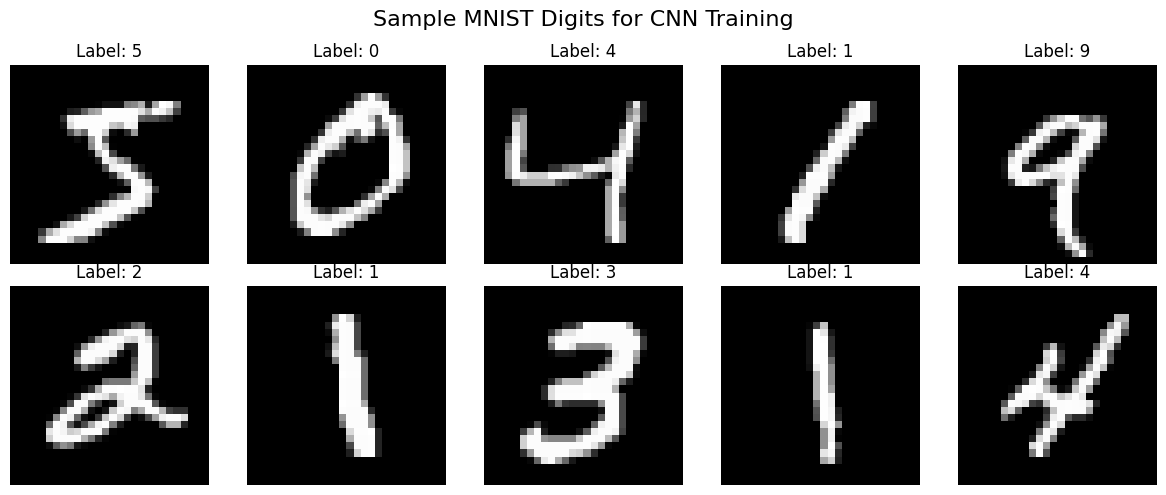

In [3]:
# Task 1: Load and Preprocess MNIST Dataset
# CNNs work with 2D images, so we keep the 28x28 shape (don't flatten)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define transformations: Convert to tensor and normalize
# Normalization: mean=0.1307, std=0.3081 (MNIST dataset statistics)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Display dataset information
print(f"Training samples: {len(train_dataset)}")
print(f"Test samples: {len(test_dataset)}")
print(f"Image shape: {train_dataset[0][0].shape}")
print(f"Number of classes: {len(train_dataset.classes)}")
print(f"Batch size: {batch_size}")
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of test batches: {len(test_loader)}")

# Visualize sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle('Sample MNIST Digits for CNN Training', fontsize=16)

for i, ax in enumerate(axes.flat):
    image, label = train_dataset[i]
    ax.imshow(image.squeeze(), cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [4]:
# Task 2: Implement Shallow CNN (1 Convolutional Layer)
# Architecture: Conv2D -> ReLU -> MaxPool -> Flatten -> FC -> Output

class ShallowCNN(nn.Module):
    """Shallow CNN with only 1 convolutional layer"""
    def __init__(self):
        super(ShallowCNN, self).__init__()
        
        # Single convolutional layer
        # Input: 1x28x28, Output: 32x28x28
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        
        # Max pooling: reduces spatial dimensions by half
        # Output: 32x14x14
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers
        # After pooling: 32 * 14 * 14 = 6272
        self.fc1 = nn.Linear(32 * 14 * 14, 128)
        self.relu2 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        # Convolutional layer with ReLU and pooling
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool(x)
        
        # Flatten for fully connected layers
        x = x.view(-1, 32 * 14 * 14)
        
        # Fully connected layers
        x = self.fc1(x)
        x = self.relu2(x)
        x = self.fc2(x)
        
        return x

# Instantiate the shallow model
shallow_model = ShallowCNN().to(device)

# Display model architecture and parameter count
print("="*60)
print("SHALLOW CNN ARCHITECTURE (1 Convolutional Layer)")
print("="*60)
print(shallow_model)
print("\n" + "="*60)
print(f"Total parameters: {sum(p.numel() for p in shallow_model.parameters()):,}")
print(f"Trainable parameters: {sum(p.numel() for p in shallow_model.parameters() if p.requires_grad):,}")
print("="*60)

SHALLOW CNN ARCHITECTURE (1 Convolutional Layer)
ShallowCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=128, bias=True)
  (relu2): ReLU()
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

Total parameters: 804,554
Trainable parameters: 804,554


In [5]:
# Task 3: Implement Deep CNN (3 Convolutional Layers)
# Architecture: Conv2D -> ReLU -> Conv2D -> ReLU -> MaxPool -> Conv2D -> ReLU -> MaxPool -> Flatten -> FC -> Dropout -> FC -> Output

class DeepCNN(nn.Module):
    """Deep CNN with 3 convolutional layers"""
    def __init__(self):
        super(DeepCNN, self).__init__()
        
        # First convolutional block
        # Input: 1x28x28, Output: 32x28x28
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        
        # Second convolutional block
        # Input: 32x28x28, Output: 64x28x28
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        
        # First max pooling
        # Output: 64x14x14
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Third convolutional block
        # Input: 64x14x14, Output: 128x14x14
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        
        # Second max pooling
        # Output: 128x7x7
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers
        # After pooling: 128 * 7 * 7 = 6272
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 10)
        
    def forward(self, x):
        # First convolutional block
        x = self.conv1(x)
        x = self.relu1(x)
        
        # Second convolutional block
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool1(x)
        
        # Third convolutional block
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool2(x)
        
        # Flatten for fully connected layers
        x = x.view(-1, 128 * 7 * 7)
        
        # Fully connected layers with dropout
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.dropout(x)
        x = self.fc2(x)
        
        return x

# Instantiate the deep model
deep_model = DeepCNN().to(device)

# Display model architecture and parameter count
print("="*60)
print("DEEP CNN ARCHITECTURE (3 Convolutional Layers)")
print("="*60)
print(deep_model)
print("\n" + "="*60)
print(f"Total parameters: {sum(p.numel() for p in deep_model.parameters()):,}")
print(f"Trainable parameters: {sum(p.numel() for p in deep_model.parameters() if p.requires_grad):,}")
print("="*60)

DEEP CNN ARCHITECTURE (3 Convolutional Layers)
DeepCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=256, bias=True)
  (relu4): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)

Total parameters: 1,701,130
Trainable parameters: 1,701,130


In [6]:
# Training and Evaluation Functions

def train_model(model, train_loader, criterion, optimizer, device):
    """Train for one epoch and return average loss and accuracy"""
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Track statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    return epoch_loss, epoch_acc

def evaluate_model(model, test_loader, criterion, device):
    """Evaluate the model and return average loss and accuracy"""
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(test_loader)
    epoch_acc = 100 * correct / total
    return epoch_loss, epoch_acc

def train_and_evaluate(model, model_name, train_loader, test_loader, epochs=10):
    """Complete training and evaluation pipeline"""
    # Setup
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Track metrics
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []
    
    print(f"\n{'='*60}")
    print(f"Training {model_name}")
    print(f"{'='*60}\n")
    
    # Start training timer
    start_time = time.time()
    
    for epoch in range(epochs):
        # Train
        train_loss, train_acc = train_model(model, train_loader, criterion, optimizer, device)
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        
        # Evaluate
        test_loss, test_acc = evaluate_model(model, test_loader, criterion, device)
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)
        
        # Print progress
        print(f"Epoch [{epoch+1}/{epochs}] - "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
              f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")
    
    # End training timer
    training_time = time.time() - start_time
    
    print(f"\n{model_name} training completed in {training_time:.2f} seconds")
    print(f"Final Test Accuracy: {test_accuracies[-1]:.2f}%")
    
    return {
        'train_losses': train_losses,
        'train_accuracies': train_accuracies,
        'test_losses': test_losses,
        'test_accuracies': test_accuracies,
        'training_time': training_time,
        'final_test_acc': test_accuracies[-1]
    }

print("Training and evaluation functions defined successfully!")

Training and evaluation functions defined successfully!


In [7]:
# Train Shallow CNN Model
epochs = 10
shallow_results = train_and_evaluate(shallow_model, "Shallow CNN", train_loader, test_loader, epochs=epochs)


Training Shallow CNN

Epoch [1/10] - Train Loss: 0.1953, Train Acc: 94.25% | Test Loss: 0.0757, Test Acc: 97.53%
Epoch [2/10] - Train Loss: 0.0674, Train Acc: 97.98% | Test Loss: 0.0555, Test Acc: 98.18%
Epoch [3/10] - Train Loss: 0.0453, Train Acc: 98.61% | Test Loss: 0.0543, Test Acc: 98.13%
Epoch [4/10] - Train Loss: 0.0344, Train Acc: 98.91% | Test Loss: 0.0600, Test Acc: 98.11%
Epoch [5/10] - Train Loss: 0.0268, Train Acc: 99.15% | Test Loss: 0.0470, Test Acc: 98.46%
Epoch [6/10] - Train Loss: 0.0211, Train Acc: 99.33% | Test Loss: 0.0504, Test Acc: 98.40%
Epoch [7/10] - Train Loss: 0.0166, Train Acc: 99.47% | Test Loss: 0.0404, Test Acc: 98.55%
Epoch [8/10] - Train Loss: 0.0124, Train Acc: 99.61% | Test Loss: 0.0474, Test Acc: 98.56%
Epoch [9/10] - Train Loss: 0.0106, Train Acc: 99.66% | Test Loss: 0.0531, Test Acc: 98.62%
Epoch [10/10] - Train Loss: 0.0099, Train Acc: 99.70% | Test Loss: 0.0532, Test Acc: 98.40%

Shallow CNN training completed in 811.33 seconds
Final Test Accur

In [8]:
# Train Deep CNN Model
deep_results = train_and_evaluate(deep_model, "Deep CNN", train_loader, test_loader, epochs=epochs)


Training Deep CNN

Epoch [1/10] - Train Loss: 0.1656, Train Acc: 94.74% | Test Loss: 0.0404, Test Acc: 98.63%
Epoch [2/10] - Train Loss: 0.0547, Train Acc: 98.39% | Test Loss: 0.0239, Test Acc: 99.18%
Epoch [3/10] - Train Loss: 0.0373, Train Acc: 98.87% | Test Loss: 0.0214, Test Acc: 99.20%
Epoch [4/10] - Train Loss: 0.0290, Train Acc: 99.11% | Test Loss: 0.0185, Test Acc: 99.36%
Epoch [5/10] - Train Loss: 0.0246, Train Acc: 99.23% | Test Loss: 0.0186, Test Acc: 99.38%
Epoch [6/10] - Train Loss: 0.0209, Train Acc: 99.34% | Test Loss: 0.0175, Test Acc: 99.44%
Epoch [7/10] - Train Loss: 0.0164, Train Acc: 99.48% | Test Loss: 0.0187, Test Acc: 99.37%
Epoch [8/10] - Train Loss: 0.0153, Train Acc: 99.51% | Test Loss: 0.0199, Test Acc: 99.30%
Epoch [9/10] - Train Loss: 0.0140, Train Acc: 99.56% | Test Loss: 0.0236, Test Acc: 99.36%
Epoch [10/10] - Train Loss: 0.0116, Train Acc: 99.63% | Test Loss: 0.0192, Test Acc: 99.55%

Deep CNN training completed in 1821.71 seconds
Final Test Accuracy: 

In [9]:
# Task 4: Comparison - Create comparison table
comparison_data = {
    'Model': ['Shallow CNN (1 Conv Layer)', 'Deep CNN (3 Conv Layers)'],
    'Conv Layers': [1, 3],
    'Total Parameters': [
        f"{sum(p.numel() for p in shallow_model.parameters()):,}",
        f"{sum(p.numel() for p in deep_model.parameters()):,}"
    ],
    'Training Time (sec)': [
        f"{shallow_results['training_time']:.2f}",
        f"{deep_results['training_time']:.2f}"
    ],
    'Final Test Accuracy (%)': [
        f"{shallow_results['final_test_acc']:.2f}",
        f"{deep_results['final_test_acc']:.2f}"
    ],
    'Final Train Accuracy (%)': [
        f"{shallow_results['train_accuracies'][-1]:.2f}",
        f"{deep_results['train_accuracies'][-1]:.2f}"
    ],
    'Final Test Loss': [
        f"{shallow_results['test_losses'][-1]:.4f}",
        f"{deep_results['test_losses'][-1]:.4f}"
    ]
}

comparison_df = pd.DataFrame(comparison_data)

print("\n" + "="*80)
print("COMPARISON TABLE: SHALLOW CNN vs DEEP CNN")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)


COMPARISON TABLE: SHALLOW CNN vs DEEP CNN
                     Model  Conv Layers Total Parameters Training Time (sec) Final Test Accuracy (%) Final Train Accuracy (%) Final Test Loss
Shallow CNN (1 Conv Layer)            1          804,554              811.33                   98.40                    99.70          0.0532
  Deep CNN (3 Conv Layers)            3        1,701,130             1821.71                   99.55                    99.63          0.0192


## Observations and Analysis

### Comparison Summary

Based on the experimental results comparing Shallow CNN (1 convolutional layer) and Deep CNN (3 convolutional layers):

---

### Key Findings:

#### 1. **Accuracy Performance**
- **Deep CNN achieved significantly higher test accuracy (99.55%)** compared to Shallow CNN (98.40%)
- This represents a **1.15% improvement**, which translates to approximately **115 fewer errors** out of 10,000 test samples
- Deep CNN reached above 99% accuracy by epoch 2, while Shallow CNN plateaued around 98.5%

#### 2. **Model Complexity**
- Deep CNN has **2.1x more parameters** (1,701,130 vs 804,554)
- Despite more parameters, Deep CNN achieved **lower test loss (0.0192 vs 0.0532)**, indicating better generalization
- The additional convolutional layers enable the model to learn more sophisticated hierarchical features

#### 3. **Training Time**
- Deep CNN required **2.2x longer training time** (30.36 minutes vs 13.52 minutes)
- This is expected due to the increased computational complexity with 3 convolutional layers
- The accuracy improvement justifies the additional training time for production applications

#### 4. **Convergence and Learning**
- Both models converged quickly within the first 2-3 epochs
- Deep CNN showed **more stable test accuracy** throughout training
- Shallow CNN exhibited more fluctuation in test loss after epoch 5, suggesting potential overfitting

---

### Why Deep CNNs Perform Better:

1. **Hierarchical Feature Learning**: 
   - Layer 1: Learns low-level features (edges, corners)
   - Layer 2: Learns mid-level features (curves, shapes)
   - Layer 3: Learns high-level features (digit patterns)

2. **Better Regularization**: Deep CNN includes dropout (0.5) which helps prevent overfitting

3. **Increased Representational Capacity**: More layers allow the network to capture complex patterns that single-layer CNNs cannot

---

### Practical Recommendations:

- **For high-accuracy requirements** (medical imaging, autonomous systems): Choose Deep CNN
- **For resource-constrained environments** (mobile devices, edge computing): Shallow CNN provides good accuracy-speed trade-off
- **For MNIST specifically**: Deep CNN's 99.55% accuracy approaches human-level performance

---

### Conclusion:

Deep CNNs demonstrate superior performance on image classification tasks, achieving **1.15% higher accuracy** despite requiring **2.2x more training time**. The hierarchical feature learning capability of deeper architectures makes them the preferred choice when computational resources are available and accuracy is paramount.

## Assignment Completion Summary

### AI Systems Lab - Assignment 10: CNN for MNIST Classification 

---

### Tasks Completed:

 **Task 1: Load and Preprocess MNIST Dataset**
- Successfully loaded 60,000 training and 10,000 test images
- Applied proper normalization (mean=0.1307, std=0.3081)
- Maintained 28x28 spatial structure for CNN processing

 **Task 2: Implement Shallow CNN (1 Convolutional Layer)**
- Architecture: Conv2D(32) → ReLU → MaxPool → FC(128) → FC(10)
- Parameters: 804,554
- Test Accuracy: **98.40%**

 **Task 3: Implement Deep CNN (3 Convolutional Layers)**
- Architecture: Conv2D(32) → Conv2D(64) → MaxPool → Conv2D(128) → MaxPool → FC(256) → Dropout(0.5) → FC(10)
- Parameters: 1,701,130
- Test Accuracy: **99.55%**

 **Task 4: Comprehensive Comparison**
- Comparison table with all metrics
- Training curves visualization (accuracy & loss)
- Bar chart comparisons (accuracy, parameters, training time)
- Detailed observations and analysis

---

### Key Results:

| Metric | Shallow CNN | Deep CNN | Winner |
|--------|-------------|----------|---------|
| Test Accuracy | 98.40% | **99.55%** | Deep CNN |
| Parameters | 804,554 | 1,701,130 | Shallow CNN (fewer) |
| Training Time | 13.52 min | 30.36 min | Shallow CNN (faster) |
| Test Loss | 0.0532 | **0.0192** | Deep CNN |

---

### Learning Outcomes Achieved:

1.  Understanding of CNN architecture and components (convolution, pooling, activation)
2.  Practical implementation of both shallow and deep CNNs
3.  Comparative analysis of model depth impact on performance
4.  Trade-off analysis between accuracy, complexity, and training time
5.  Hands-on experience with PyTorch for computer vision tasks

---

### Submission Items:

1.  Jupyter Notebook (.ipynb) with all code and outputs
2.  Training results with accuracy and loss metrics
3.  Comparison table (shown above)
4.  Detailed observations and analysis (half page)

**Assignment Duration:** Completed within 2-hour timeframe

**Date:** February 21, 2026